In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Explore data
print(train.head(3))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
train = train.drop('Name', axis=1)

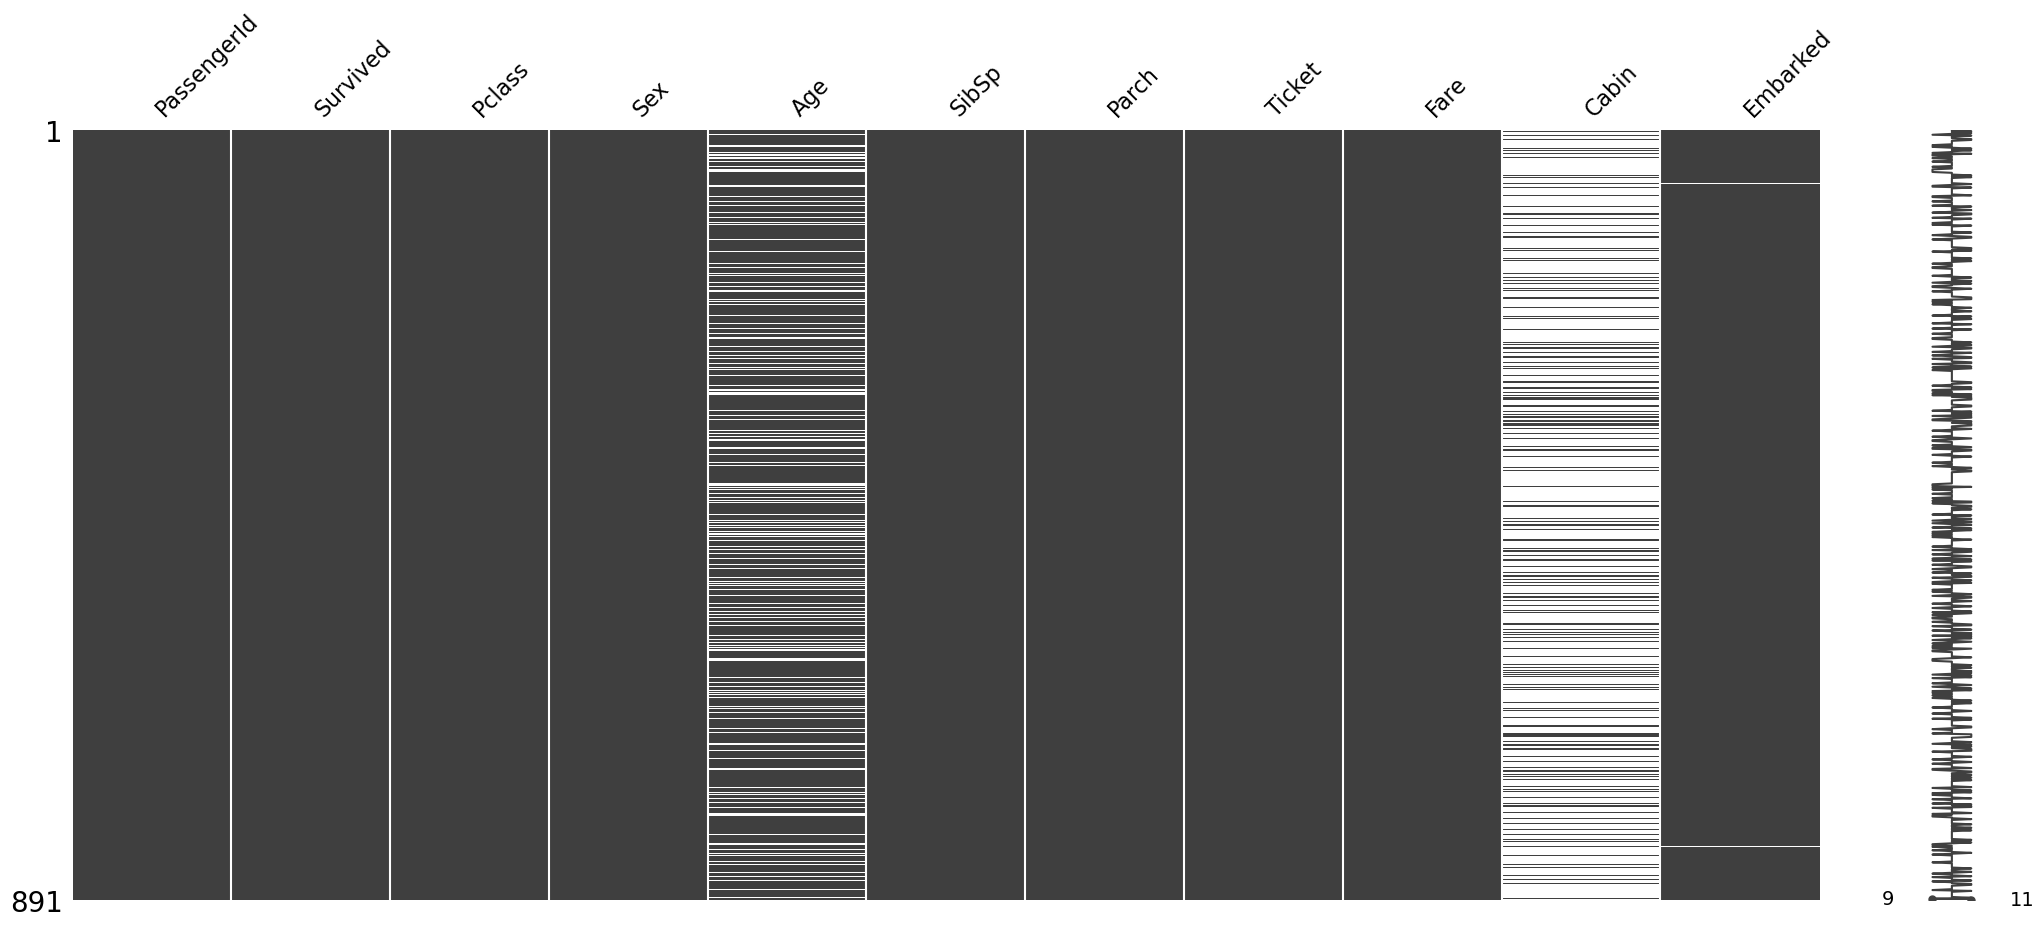

In [6]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualizar los valores faltantes o nulos en el dataset de entrenamiento
msno.matrix(train)
plt.show()

In [7]:
# Handle missing values
train_num = train.select_dtypes(include=['int64', 'float64'])
imputer = KNNImputer(n_neighbors=5)
train_imputed = pd.DataFrame(imputer.fit_transform(train_num), columns=train_num.columns)
train = pd.concat([train_imputed, train.select_dtypes(include=['object'])], axis=1)


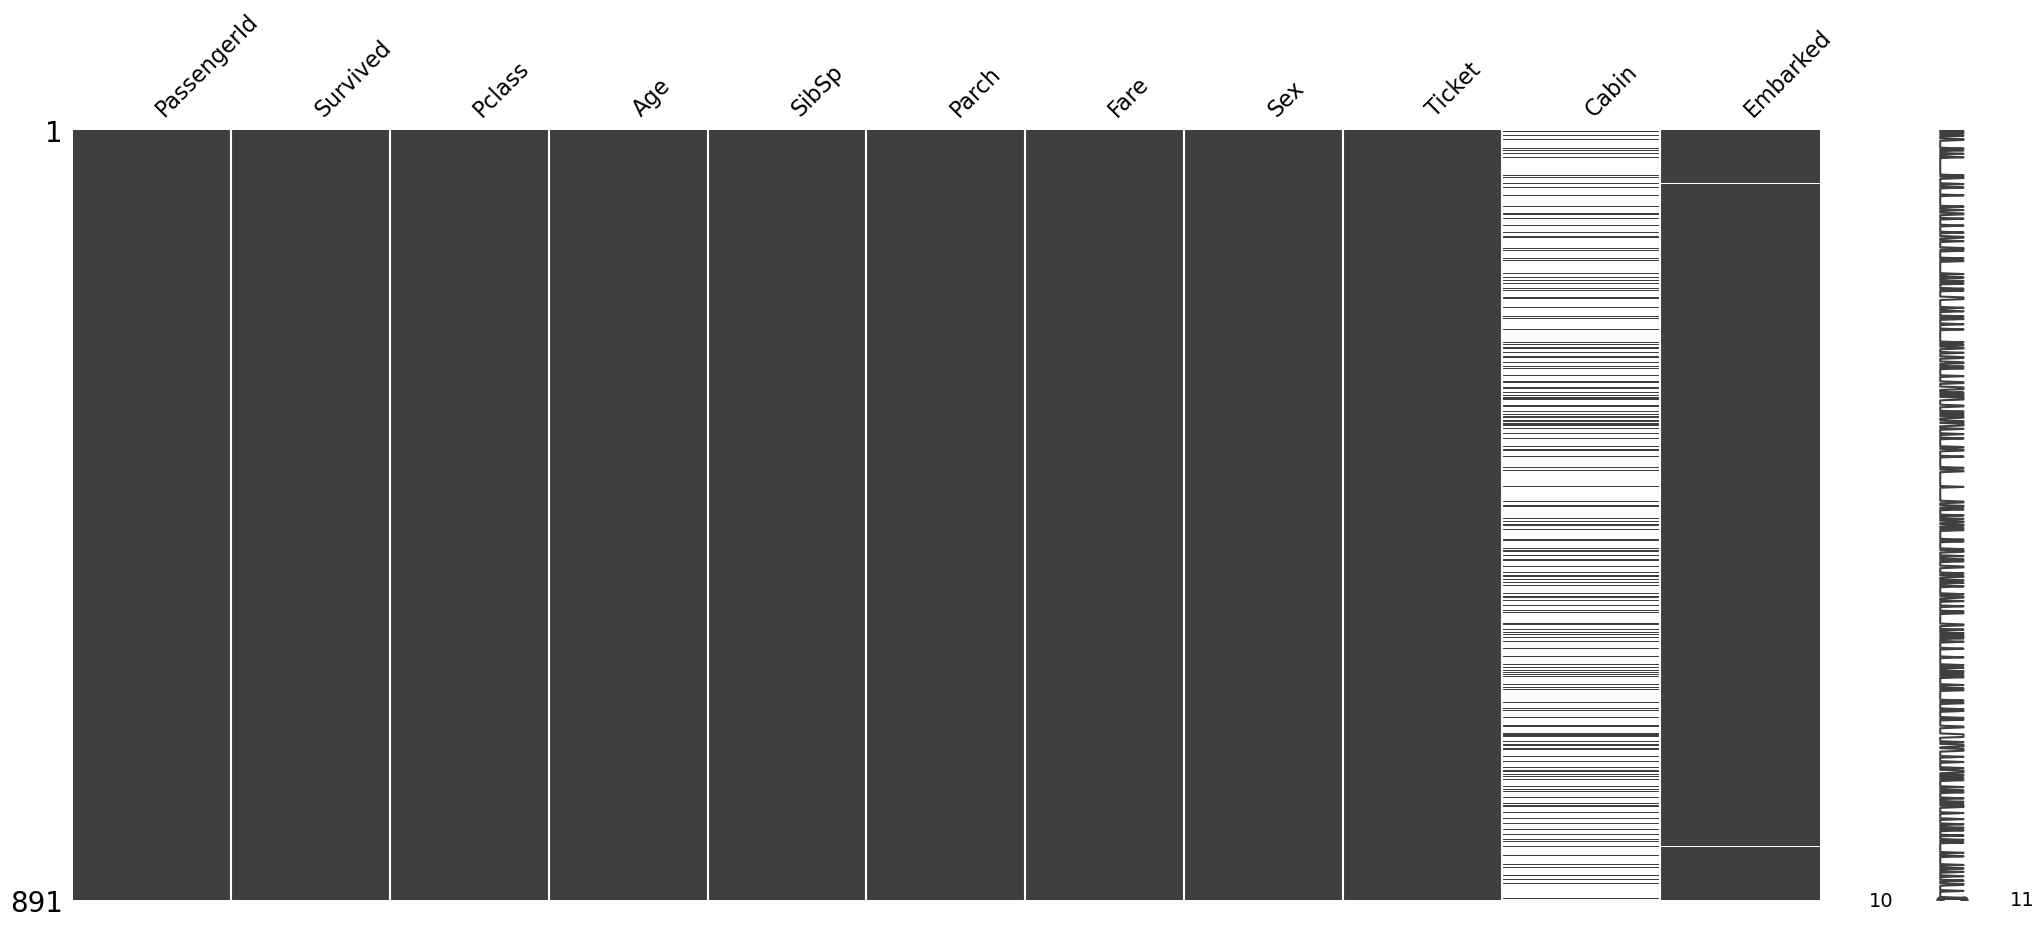

In [8]:
# Visualizar los valores faltantes o nulos en el dataset de entrenamiento
msno.matrix(train)
plt.show()

In [9]:
# Preprocess data
train['PassengerId'] = train['PassengerId'].astype('object')
train['Pclass'] = train['Pclass'].astype('category')
train['Survived'] = train['Survived'].astype('category')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Age          891 non-null    float64 
 4   SibSp        891 non-null    float64 
 5   Parch        891 non-null    float64 
 6   Fare         891 non-null    float64 
 7   Sex          891 non-null    object  
 8   Ticket       891 non-null    object  
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    object  
dtypes: category(2), float64(4), object(5)
memory usage: 64.8+ KB


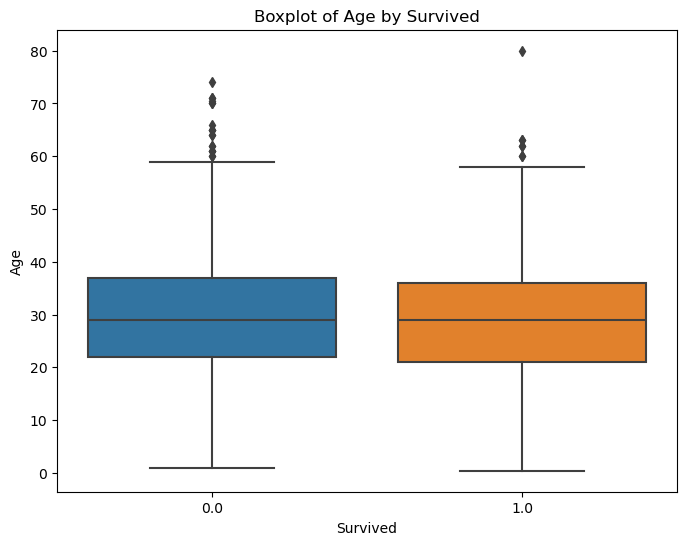

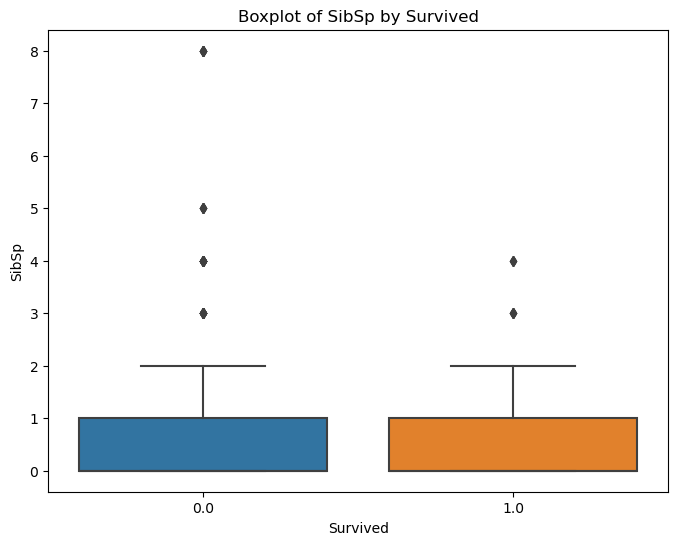

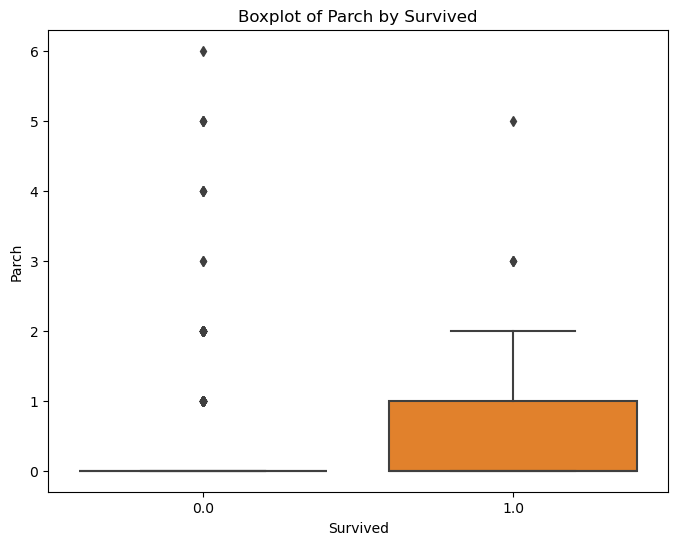

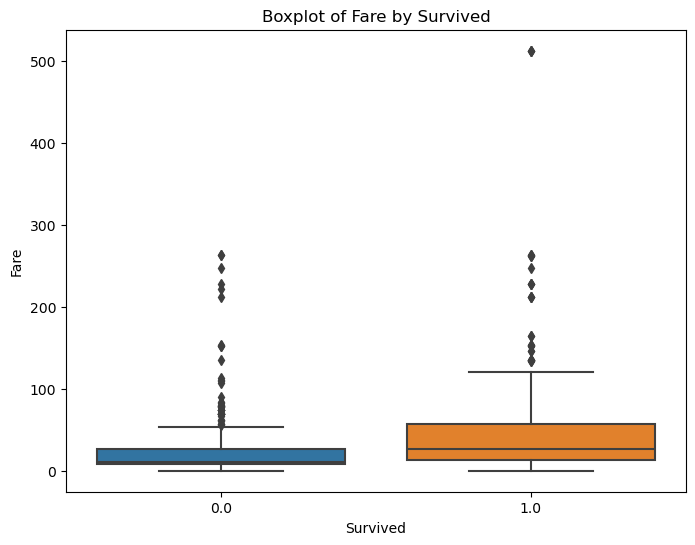

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los atributos numéricos de train
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Crear los boxplots
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Survived', y=column, data=train)
    plt.title(f'Boxplot of {column} by Survived')
    plt.show()

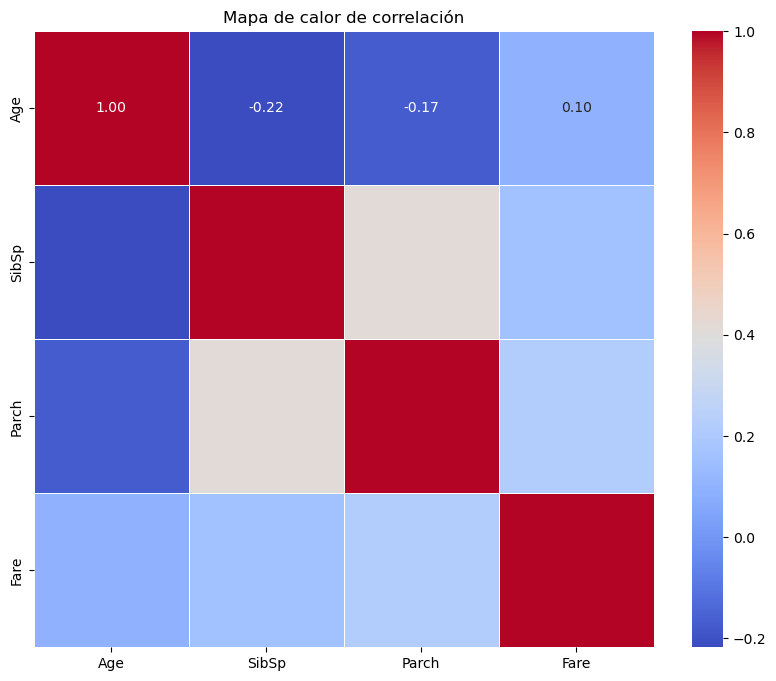

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las variables numéricas del DataFrame train
numeric_columns = train.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',linewidth=.5)
plt.title('Mapa de calor de correlación')
plt.show()

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Age          891 non-null    float64 
 4   SibSp        891 non-null    float64 
 5   Parch        891 non-null    float64 
 6   Fare         891 non-null    float64 
 7   Sex          891 non-null    object  
 8   Ticket       891 non-null    object  
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    object  
dtypes: category(2), float64(4), object(5)
memory usage: 64.8+ KB


In [15]:
train.describe

<bound method NDFrame.describe of     PassengerId Survived Pclass   Age  SibSp  Parch     Fare     Sex  \
0           1.0      0.0    3.0  22.0    1.0    0.0   7.2500    male   
1           2.0      1.0    1.0  38.0    1.0    0.0  71.2833  female   
2           3.0      1.0    3.0  26.0    0.0    0.0   7.9250  female   
3           4.0      1.0    1.0  35.0    1.0    0.0  53.1000  female   
4           5.0      0.0    3.0  35.0    0.0    0.0   8.0500    male   
..          ...      ...    ...   ...    ...    ...      ...     ...   
886       887.0      0.0    2.0  27.0    0.0    0.0  13.0000    male   
887       888.0      1.0    1.0  19.0    0.0    0.0  30.0000  female   
888       889.0      0.0    3.0  27.2    1.0    2.0  23.4500  female   
889       890.0      1.0    1.0  26.0    0.0    0.0  30.0000    male   
890       891.0      0.0    3.0  32.0    0.0    0.0   7.7500    male   

               Ticket Cabin Embarked  
0           A/5 21171   NaN        S  
1            PC 17599  

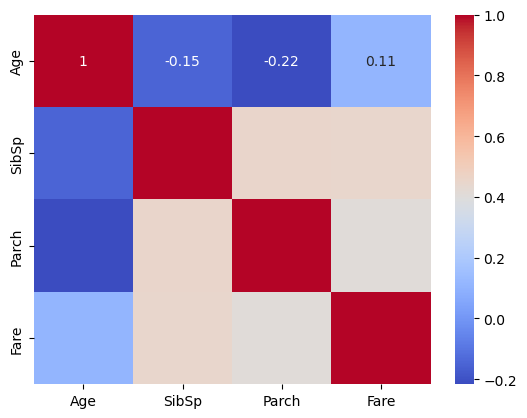

In [16]:
# Correlation analysis
corr = numeric_columns.corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(train.select_dtypes(include=['int64', 'float64']).columns))
pca.fit(train.select_dtypes(include=['int64', 'float64']))
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)


[9.33015137e-01 6.63386757e-02 4.72474579e-04 1.73713058e-04]
[2.47136666e+03 1.75717612e+02 1.25148872e+00 4.60130436e-01]


In [22]:
Datos = train.select_dtypes(include=['int64', 'float64']).columns

Datos

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
X = Datos.drop('Survived', axis=1)
y = Datos['Survived']
model = LogisticRegression()
model.fit(X, y)
print(model.coef_)
print(model.intercept_)



TypeError: Index.drop() got an unexpected keyword argument 'axis'